In [4]:
pip install pm4py

In [5]:
import pandas as pd
import pm4py
import numpy as np
from pm4py.visualization.petri_net import visualizer

In [1]:
ISSUES_PATH = "total_issues.csv"
COMMITS_PATH = "total.csv"

In [6]:
issues_df = pd.read_csv(ISSUES_PATH, encoding="utf-8")

In [7]:
issues_df = issues_df.rename(columns= {
    ' "creation_date"': "creation_date",
    ' "labels"': "label",
    ' "id"': "id",
    ' "title_len"': "title_len",
    ' "last_modified_date"': "last_modified_date",
    ' "closed_at"': "closed_at",
    ' "author"': "author",
    ' "comments_num"': "comments_num"
})

In [8]:
commits_df = pd.read_csv(COMMITS_PATH)

In [ ]:
issues_df['label'][0]

' '

# Модель разработки по репозиторию

In [9]:
def transform_issues(issues_df):
    res = []
    for _, row in issues_df.iterrows():
        res.append(["all_repo", pd.to_datetime(row["creation_date"]), \
                    "unnamed_issue_created" if row['label'] == " " else row['label'] + "_issue_created"])
        res.append(["all_repo", pd.to_datetime(row["closed_at"]), \
                    "unnamed_issue_closed" if row['label'] == " " else row['label'] + "_issue_closed"])
    return res

def transform_commits(commits_df):
    res = []
    for _, row in commits_df.iterrows():
        size = (2*row['additions'] + row['deletions']) / 3
        name = "commit_small" if size < 5.0 else ("commit_big" if size >= 30.0 else "commit_medium")
        res.append(["all_repo", pd.to_datetime(row["date"]), name])
    return res

In [10]:
res = transform_issues(issues_df) + transform_commits(commits_df)

In [11]:
df = pd.DataFrame(res,columns = ["case", "date", "type"])

In [12]:
df.head()

,case,date,type
0,all_repo,2022-12-18 14:34:39,unnamed_issue_created
1,all_repo,2022-12-19 15:28:55,unnamed_issue_closed
2,all_repo,2022-12-06 13:39:09,enhancement_issue_created
3,all_repo,2022-12-06 13:53:43,enhancement_issue_closed
4,all_repo,2022-12-05 21:02:05,unnamed_issue_created


In [13]:
dataframe = pm4py.format_dataframe(df, case_id='case', activity_key='type', timestamp_key='date')
event_log = pm4py.convert_to_event_log(dataframe)

<ipython-input-13-65f11d966971>:1: DeprecatedWarning: format_dataframe is deprecated as of 2.3.0 and will be removed in 3.0.0. the format_dataframe function does not need application anymore.
  dataframe = pm4py.format_dataframe(df, case_id='case', activity_key='type', timestamp_key='date')
/usr/local/lib/python3.8/dist-packages/pm4py/utils.py:486: UserWarning: the EventLog class has been deprecated and will be removed in a future release.
  warnings.warn("the EventLog class has been deprecated and will be removed in a future release.")


<ipython-input-14-ca7feb766b97>:1: DeprecatedWarning: discover_dfg is deprecated as of 2.3.0 and will be removed in 2.4.0. this method will be replaced by the discover_dfg_typed function(). Please adapt your code to use pm4py.discover_dfg_typed()
  dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)


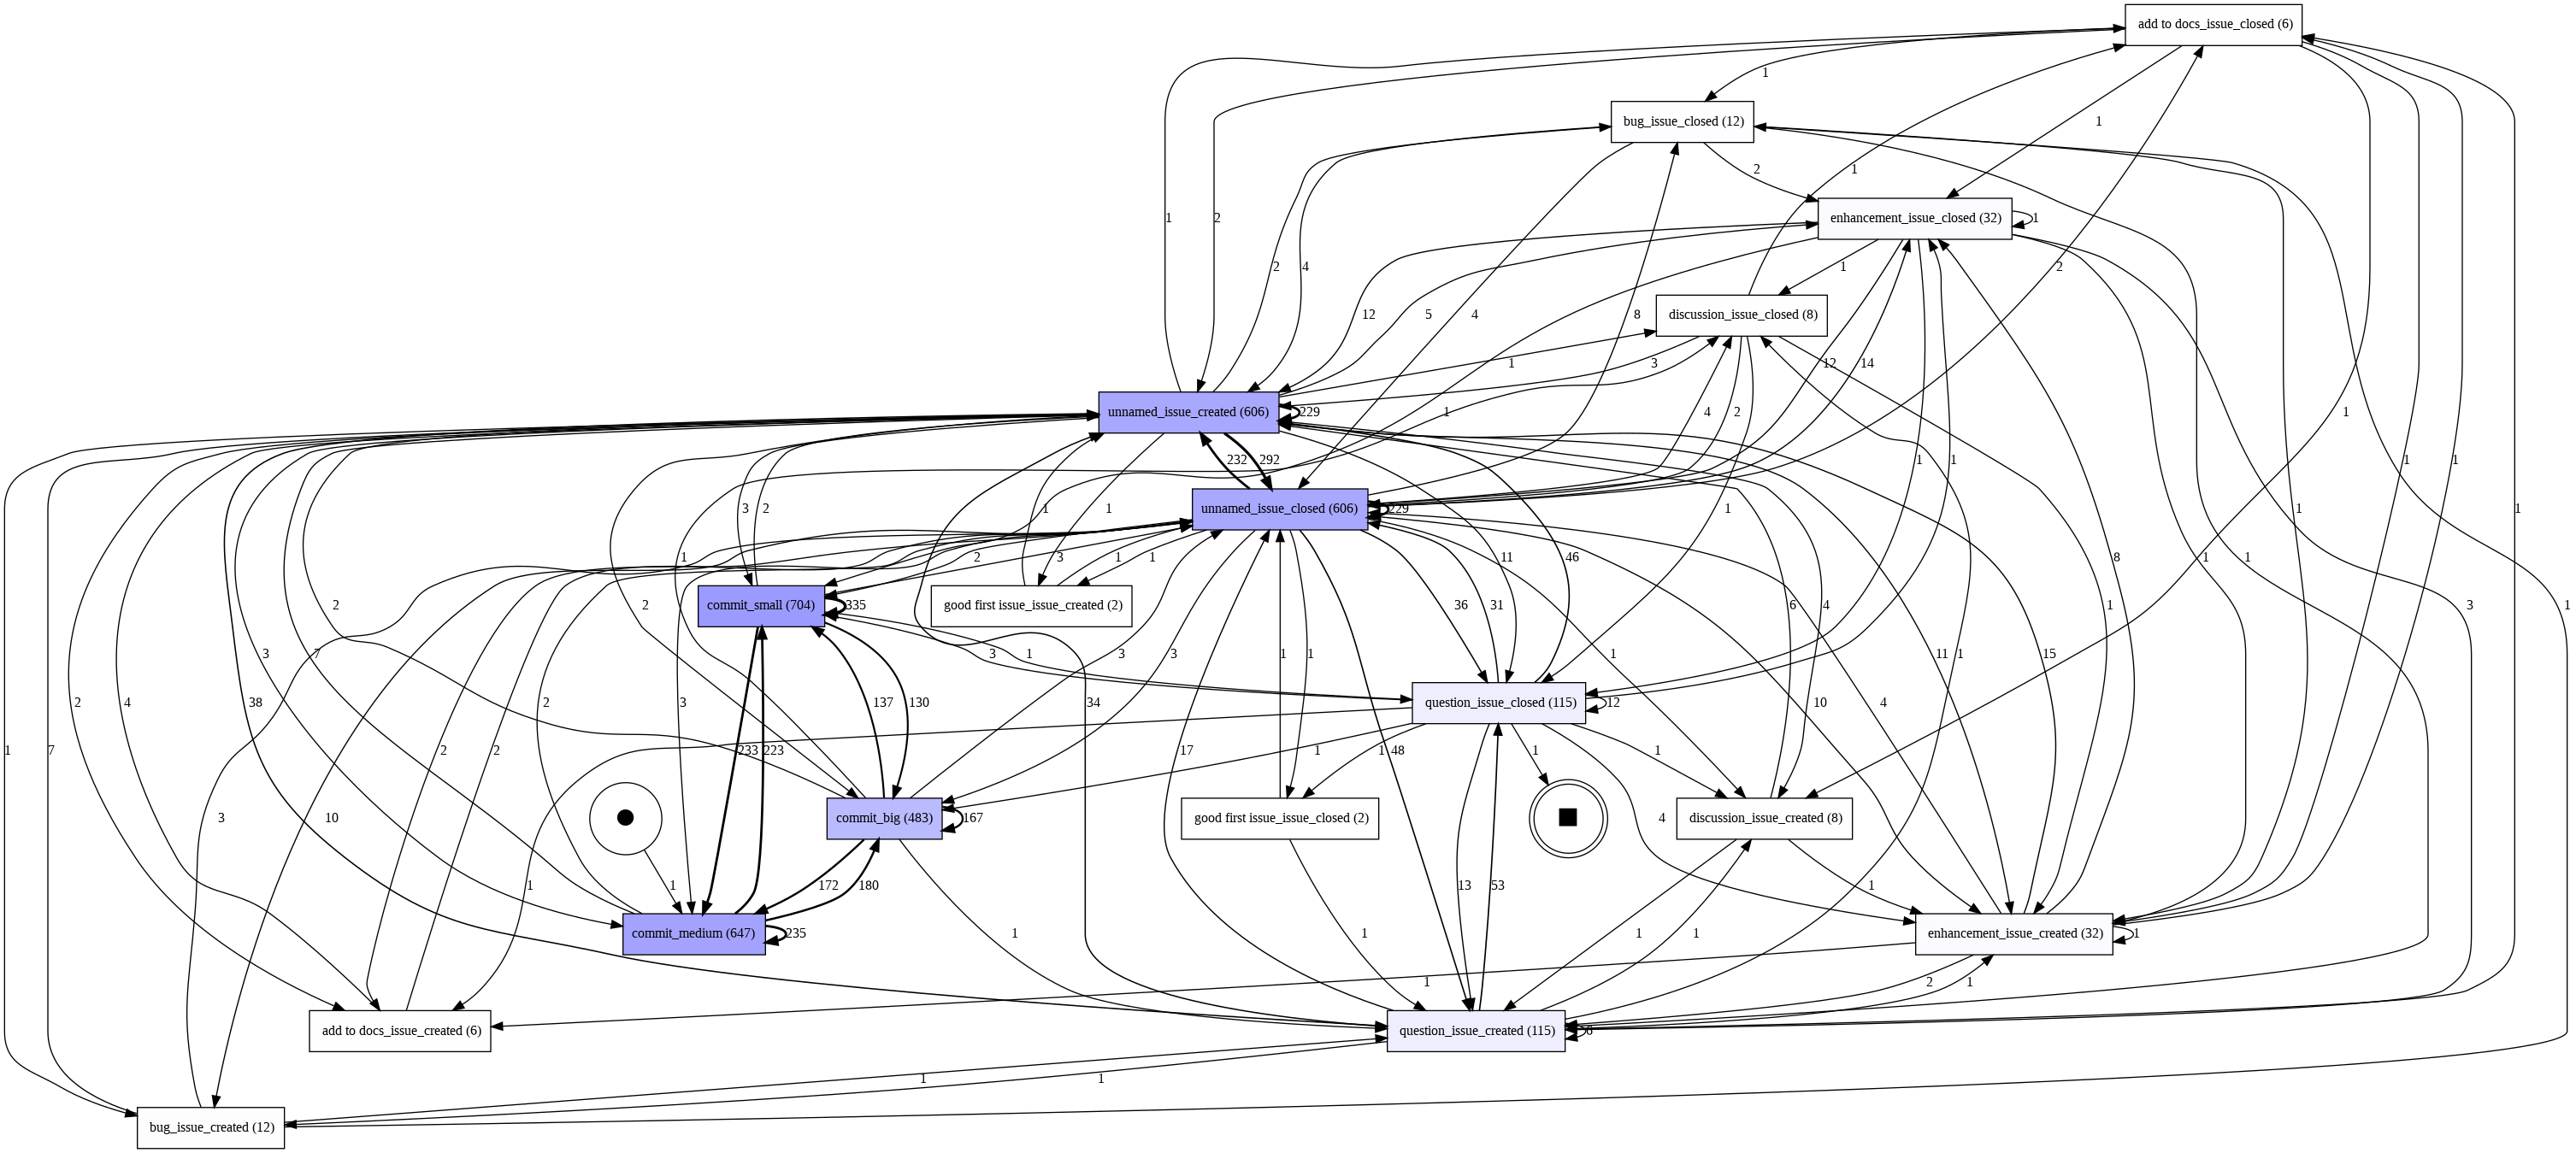

In [14]:
dfg, start_activities, end_activities = pm4py.discover_dfg(event_log)
pm4py.view_dfg(dfg, start_activities, end_activities)

In [15]:
net, initial_marking, final_marking = pm4py.discover_petri_net_alpha(event_log)

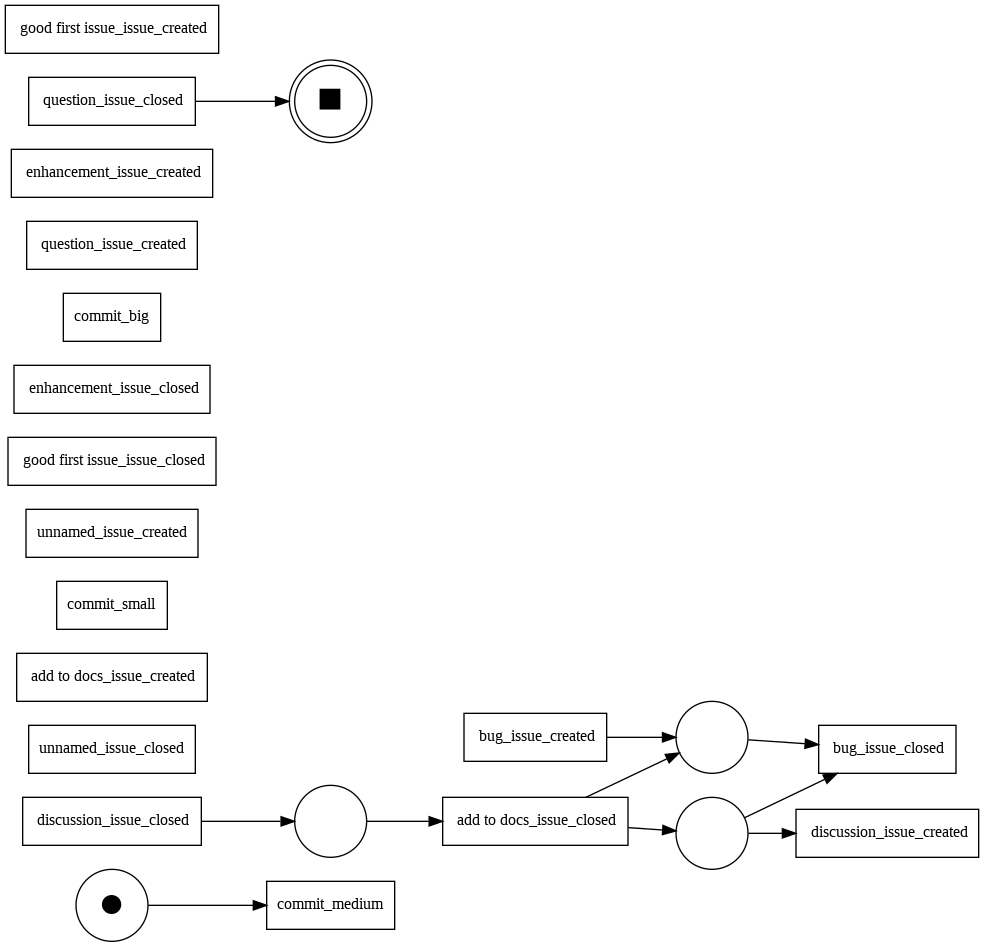

In [16]:
pm4py.view_petri_net(net, initial_marking, final_marking)

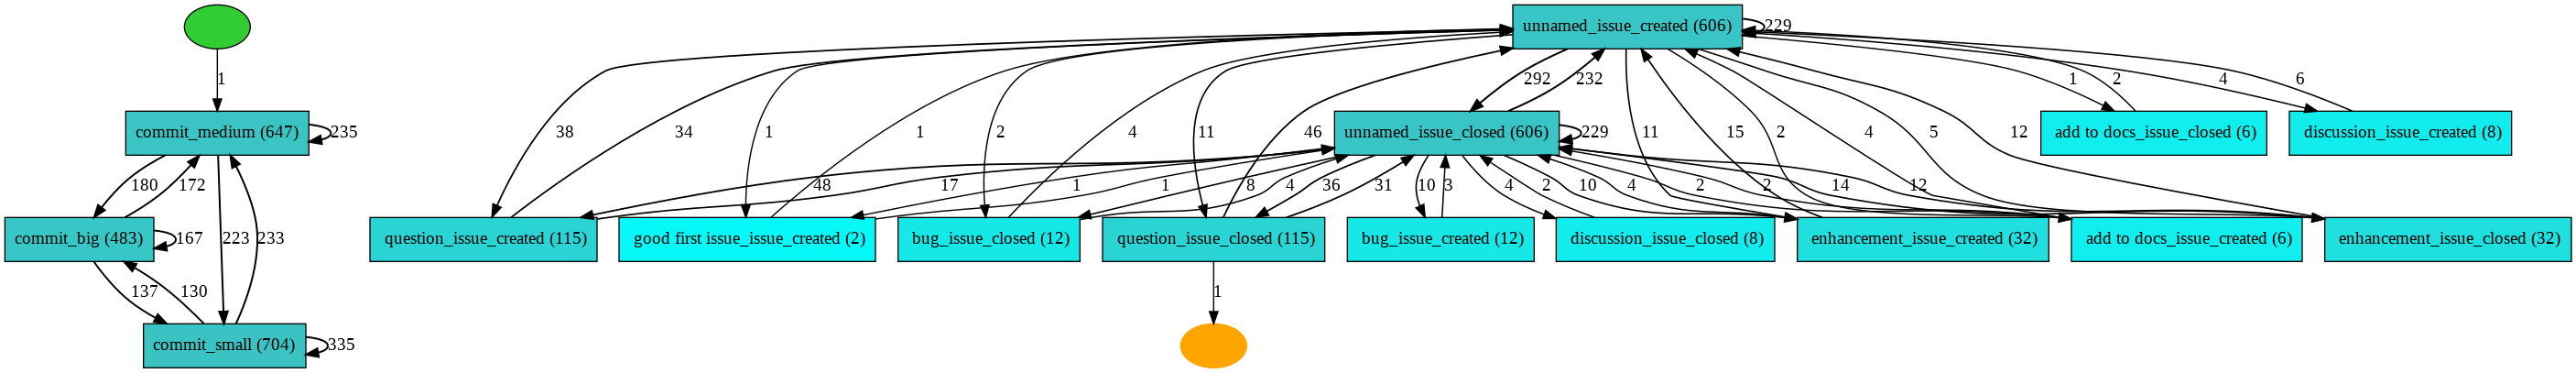

In [18]:
heu_net = pm4py.discover_heuristics_net(event_log, dependency_threshold=0.99)
pm4py.view_heuristics_net(heu_net)